In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('employee_promotion.csv')

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [4]:
df1=df.copy()

In [5]:
df1.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [6]:
df1.shape

(54808, 13)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [8]:
df1.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [9]:
print(df1.isnull().sum())

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

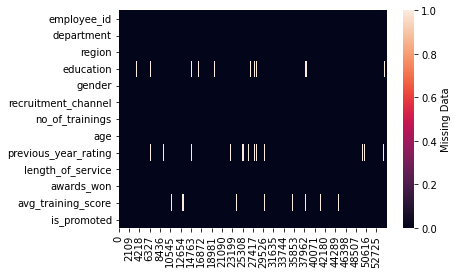

In [11]:
sns.heatmap(df1.isna().transpose(),cbar_kws={'label': 'Missing Data'})

In [12]:
df1.drop(['employee_id'],axis=1,inplace=True)

In [13]:
df1.drop_duplicates(inplace=True)

In [14]:
df1.shape

(54588, 12)

## Replacing null values

In [15]:
df1.isnull().sum()

department                 0
region                     0
education               2390
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4012
length_of_service          0
awards_won                 0
avg_training_score      2546
is_promoted                0
dtype: int64

In [16]:
df1['education'].fillna(df1['education'].mode()[0],inplace=True)

In [17]:
df1['previous_year_rating'].fillna(df1['previous_year_rating'].median(),inplace=True)

In [18]:
df1['avg_training_score'].fillna(df1['avg_training_score'].median(),inplace=True)

In [19]:
df1.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

## Analysing Univariat Features

In [20]:
df1.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
dtype: object

<Axes: xlabel='avg_training_score', ylabel='Count'>

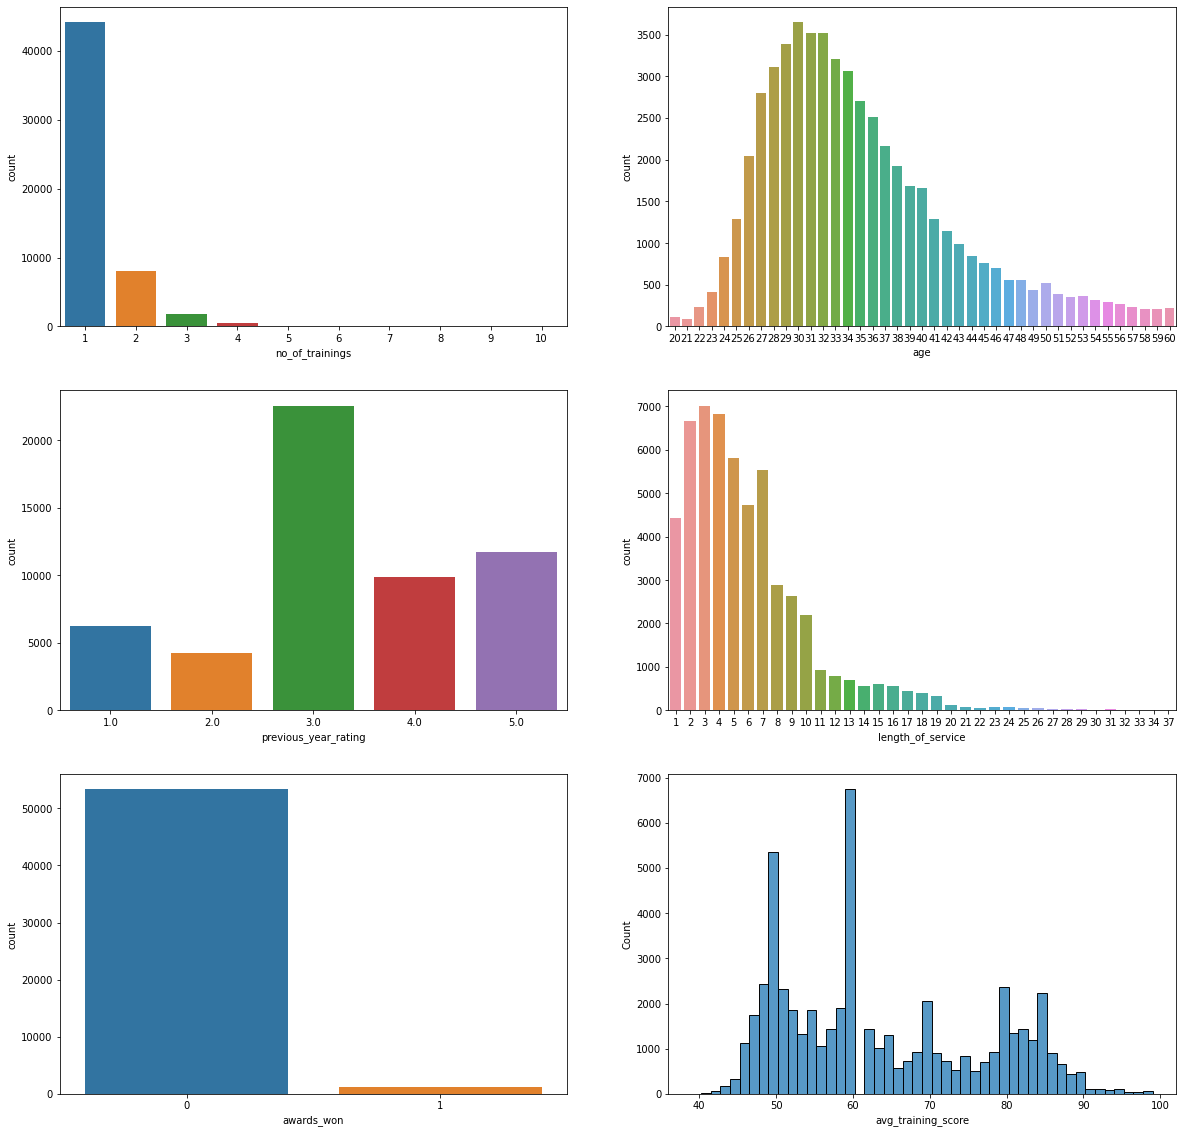

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(20,20))
sns.countplot(df1['no_of_trainings'],ax=axes[0,0])
sns.countplot(df1['age'],ax=axes[0,1])
sns.countplot(df1['previous_year_rating'],ax=axes[1,0])
sns.countplot(df1['length_of_service'],ax=axes[1,1])
sns.countplot(df1['awards_won'],ax=axes[2,0])
sns.histplot(df1['avg_training_score'],ax=axes[2,1])

 As we can see above that how each numeric features are distributed and every feature is following diffrent distribution.

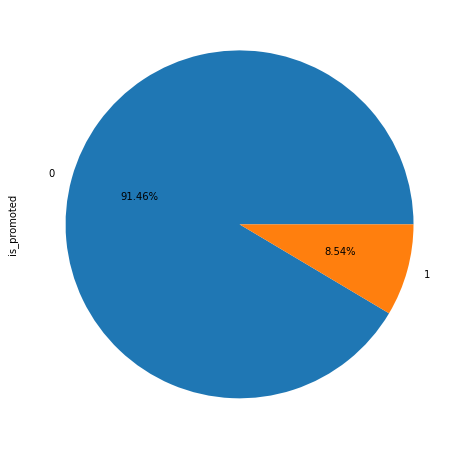

In [22]:
plt.figure(figsize = (10, 8))
df1['is_promoted'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

- As above we can see the employees who are promoted is only 8.5% and the employees who are not promoted is 91.4%.
- This data is highly imbalanced

<Axes: ylabel='department'>

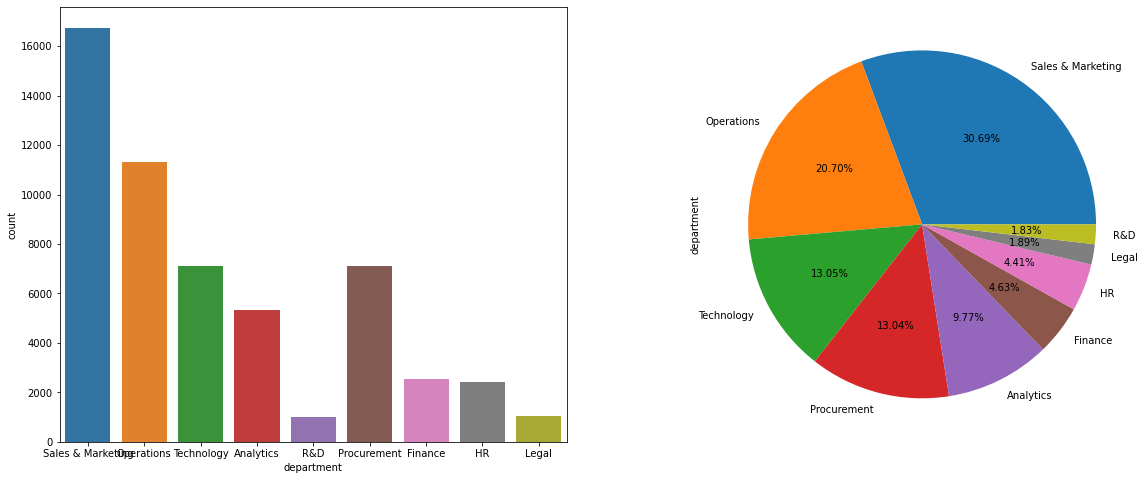

In [23]:
fig, axes = plt.subplots(1,2, figsize=(20,8))
sns.countplot(df1['department'],ax=axes[0])
df1['department'].value_counts().plot(kind='pie',autopct='%.2f%%')

- As per the above plot 30.6% of the data is sales&marketing in Department feature.

<Axes: ylabel='region'>

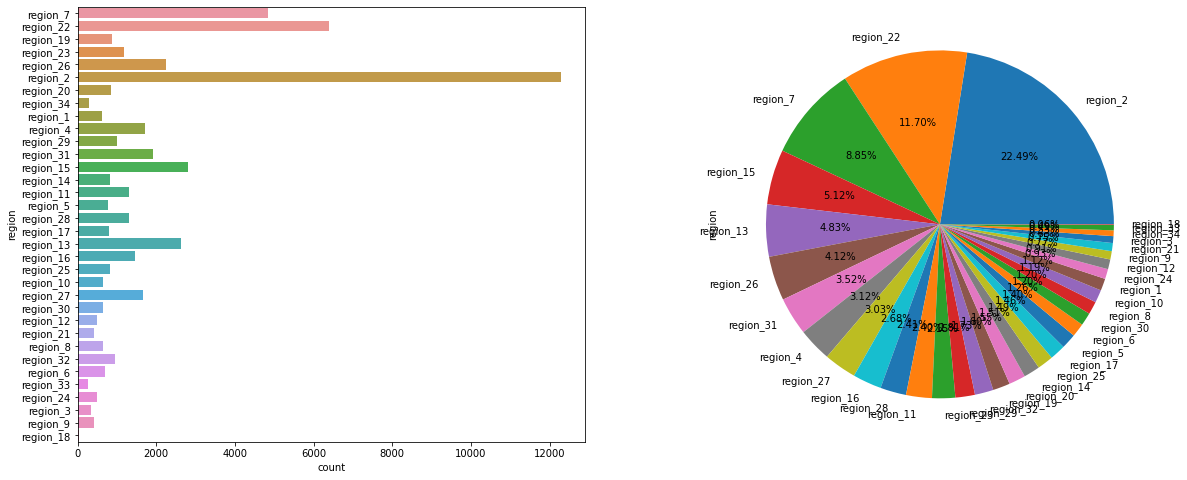

In [24]:
fig, axes = plt.subplots(1,2, figsize=(20,8))
sns.countplot(y=df1['region'],ax=axes[0])
df1['region'].value_counts().plot(kind='pie',autopct='%.2f%%')

- As per above plot 22.4% of the data is belongs to region_2.

<Axes: ylabel='education'>

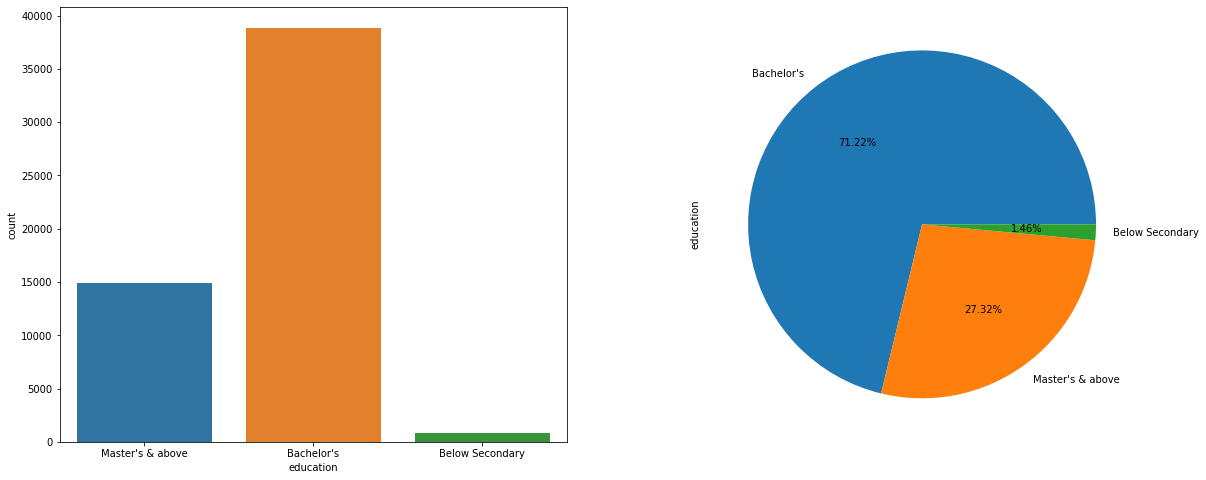

In [25]:
fig, axes = plt.subplots(1,2, figsize=(20,8))
sns.countplot(df1['education'],ax=axes[0])
df1['education'].value_counts().plot(kind='pie',autopct='%.2f%%')

- If we look at the education of employees, Bacherlors are too much with 70% data, 28% Master and 1.5 below secondary education.

<Axes: ylabel='gender'>

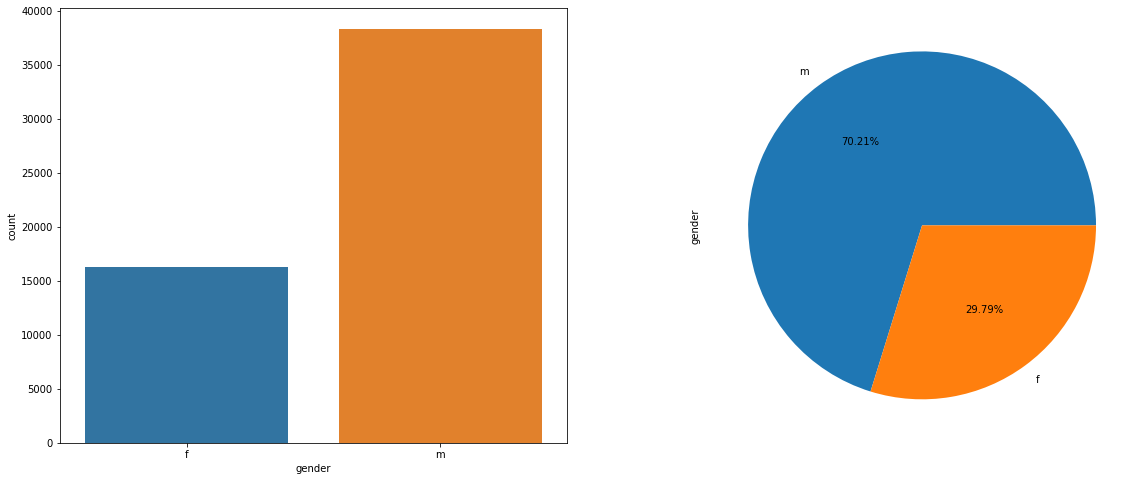

In [26]:
fig, axes = plt.subplots(1,2, figsize=(20,8))
sns.countplot(df1['gender'],ax=axes[0])
df1['gender'].value_counts().plot(kind='pie',autopct='%.2f%%')

- In this dataset 70.2% of the data belongs to male and 29.7% of the data is belongs to female.

<Axes: ylabel='recruitment_channel'>

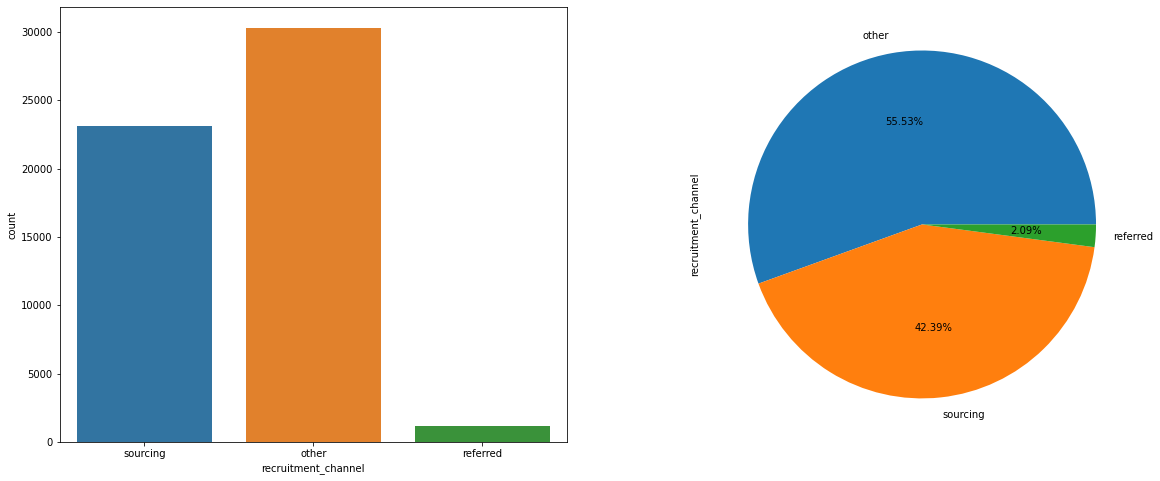

In [27]:
fig, axes = plt.subplots(1,2, figsize=(20,8))
sns.countplot(df1['recruitment_channel'],ax=axes[0])
df1['recruitment_channel'].value_counts().plot(kind='pie',autopct='%.2f%%')

- As we can see in above plot the majority of the data in recruitment_channel is other and sourcing.

<Axes: ylabel='no_of_trainings'>

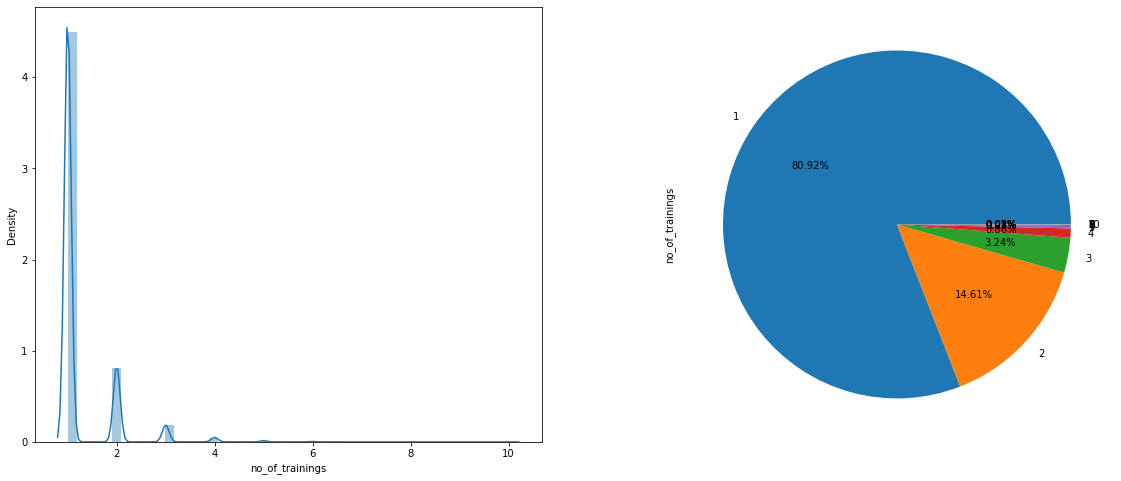

In [28]:
fig, axes = plt.subplots(1,2, figsize=(20,8))
sns.distplot(df1['no_of_trainings'],ax=axes[0])
df1['no_of_trainings'].value_counts().plot(kind='pie',autopct='%.2f%%')

- we can see in above plot to know how it is distributed and 80% of the employees completed 1 training in the previous year and 14% of the employees completed 2 training in previous year.

<Axes: >

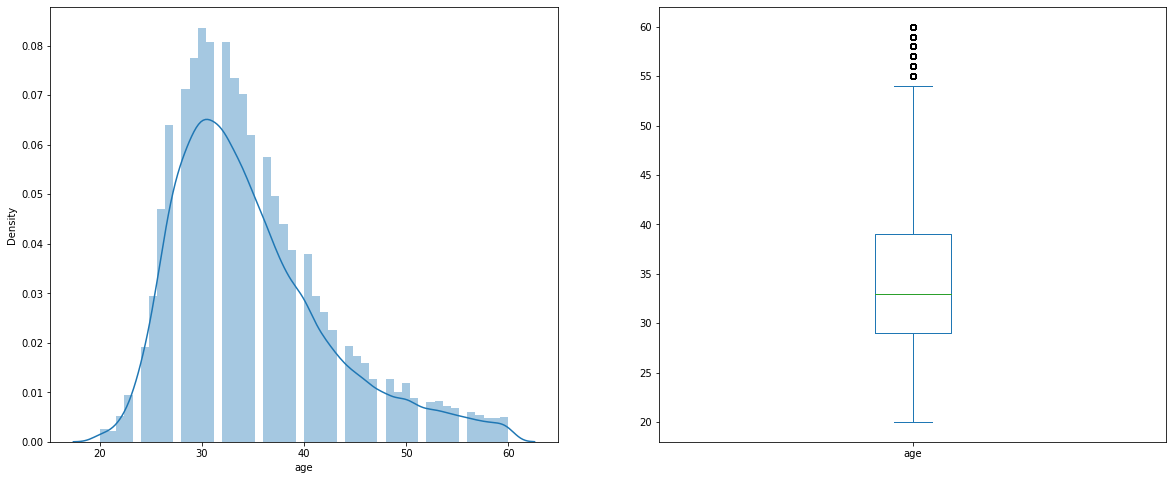

In [29]:
fig, axes = plt.subplots(1,2, figsize=(20,8))
sns.distplot(df1['age'],ax=axes[0])
df1['age'].plot(kind='box')

- In this data most of the ages are between 25 to 37.

<Axes: ylabel='previous_year_rating'>

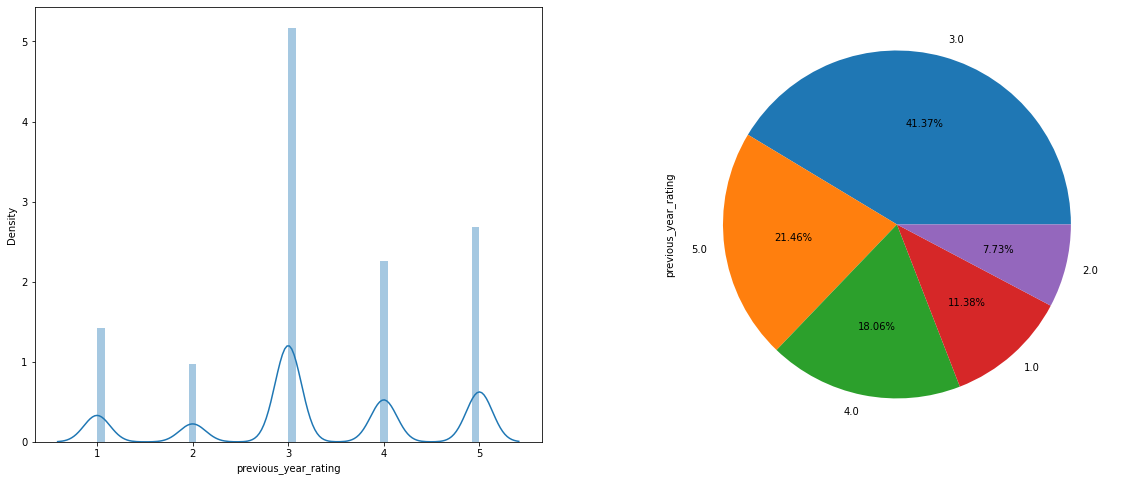

In [30]:
fig, axes = plt.subplots(1,2, figsize=(20,8))
sns.distplot(df1['previous_year_rating'],ax=axes[0])
df1['previous_year_rating'].value_counts().plot(kind='pie',autopct='%.2f%%')

- Rating 3 is most used for the employees in all data with 41.3%.

<Axes: >

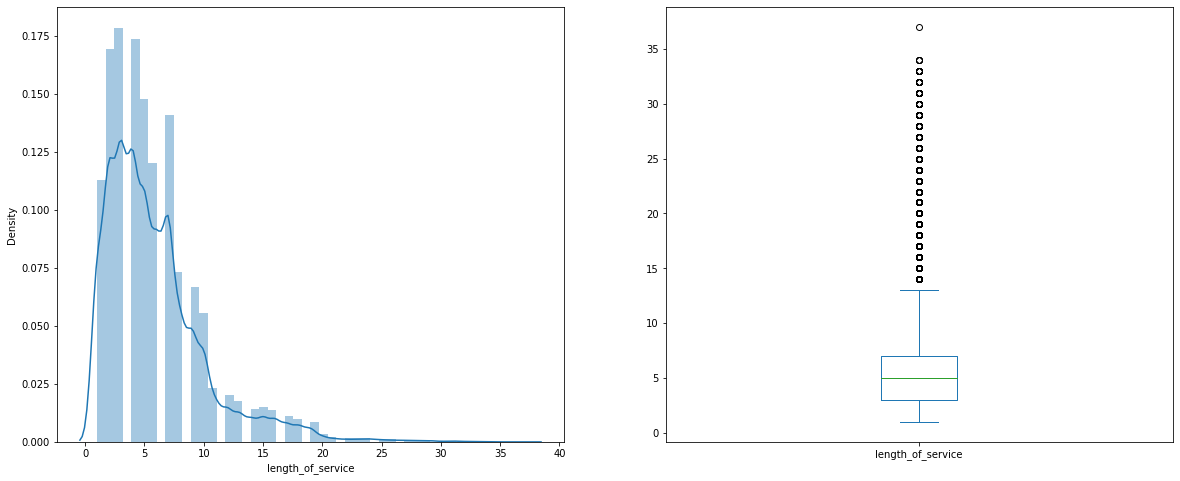

In [31]:
fig, axes = plt.subplots(1,2, figsize=(20,8))
sns.distplot(df1['length_of_service'],ax=axes[0])
df1['length_of_service'].plot(kind='box')

- most of the employees length_of_service is between 2 to 8.

<Axes: ylabel='awards_won'>

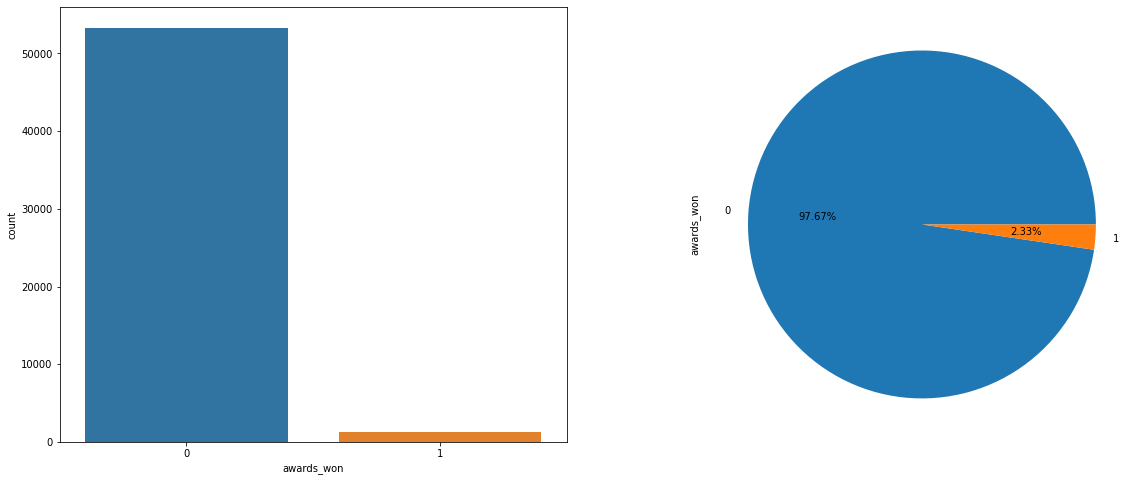

In [32]:
fig, axes = plt.subplots(1,2, figsize=(20,8))
sns.countplot(df1['awards_won'],ax=axes[0])
df1['awards_won'].value_counts().plot(kind='pie',autopct='%.2f%%')

- As we can see in the above plots only 2.33% of the employees won the awards and remaining employees have not won any awards in previous year.
- its highly imbalanced ratio.

<Axes: >

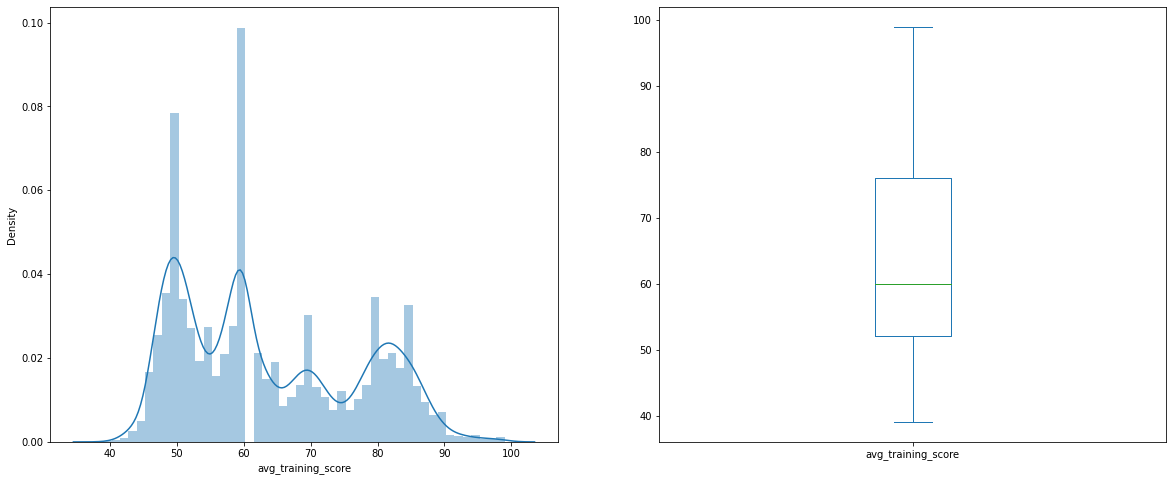

In [33]:
fig, axes = plt.subplots(1,2, figsize=(20,8))
sns.distplot(df1['avg_training_score'],ax=axes[0])
df1['avg_training_score'].plot(kind='box')

- By analyzing the above plot we say its not normaly distributed and most of the employees average training score is between 45 to 85

<Axes: ylabel='is_promoted'>

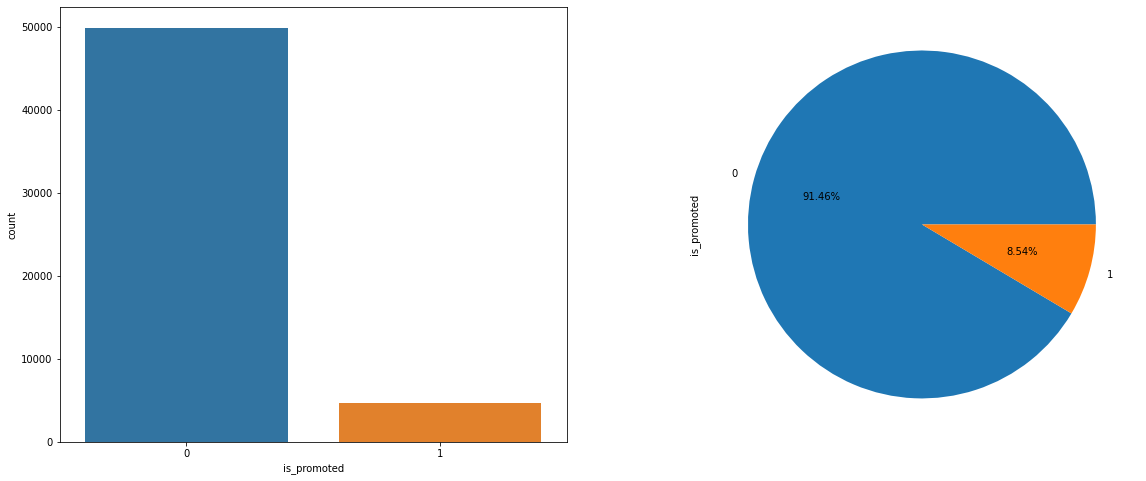

In [34]:
fig, axes = plt.subplots(1,2, figsize=(20,8))
sns.countplot(df1['is_promoted'],ax=axes[0])
df1['is_promoted'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [35]:
df1['is_promoted'].value_counts()

0    49924
1     4664
Name: is_promoted, dtype: int64

- We can clearly see that, the data is not balanced. The promoted employees are only 4664 and not promoted employees are 49924. 91.4% and 8.5% ratio is very unbalanced.

# Analyzing Independent features with Dependent Feature

### Analyzing Categoric features with Dependent Feature

<Axes: xlabel='department'>

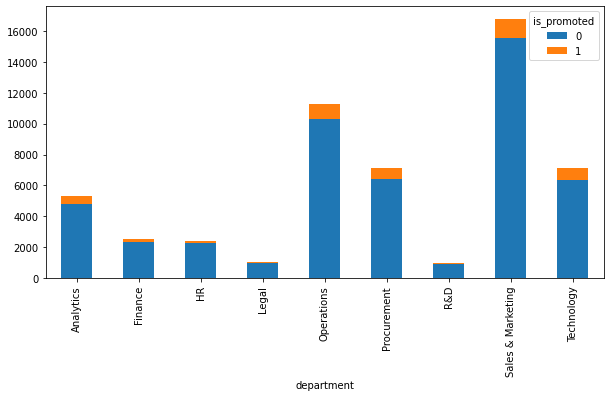

In [36]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(df1.department,df1.is_promoted)
score_bin.plot.bar(stacked=True)

<Axes: xlabel='region'>

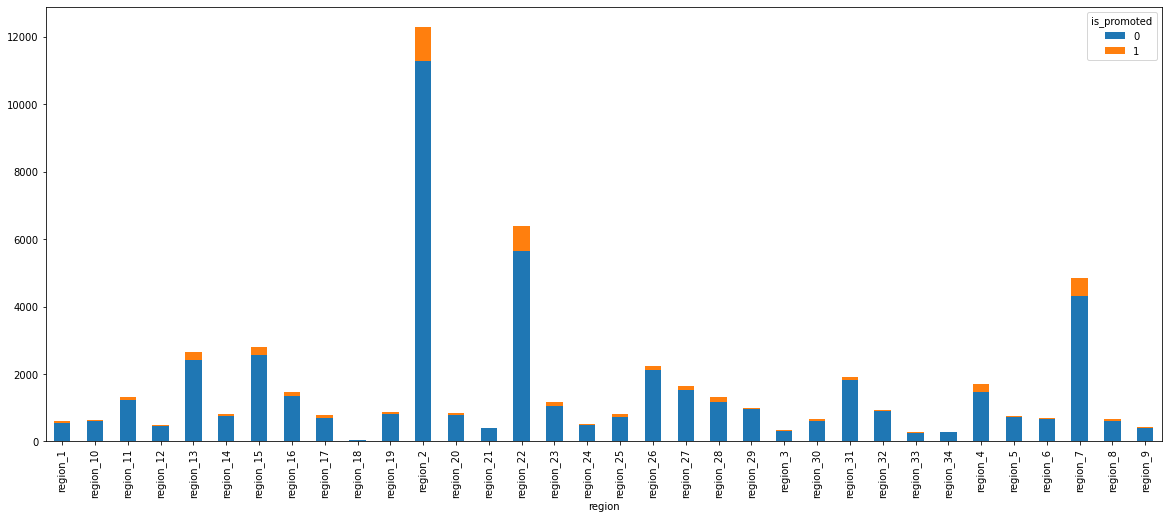

In [37]:
plt.rcParams['figure.figsize'] = [20, 8]
score_bin = pd.crosstab(df1.region,df1.is_promoted)
score_bin.plot.bar(stacked=True)

<Axes: xlabel='education'>

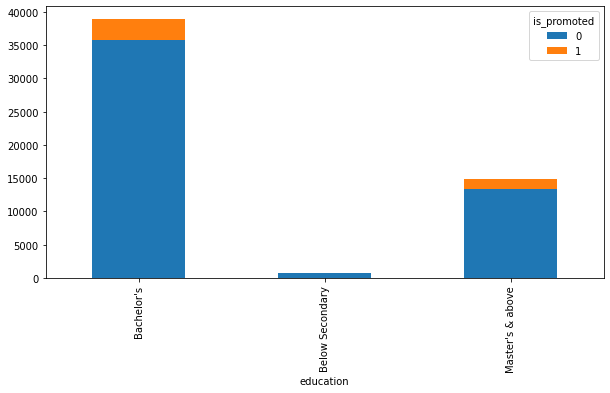

In [38]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(df1.education,df1.is_promoted)
score_bin.plot.bar(stacked=True)

<Axes: xlabel='gender'>

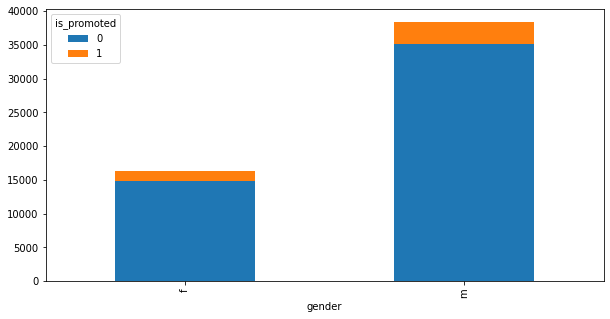

In [39]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(df1.gender,df1.is_promoted)
score_bin.plot.bar(stacked=True)

<Axes: xlabel='recruitment_channel'>

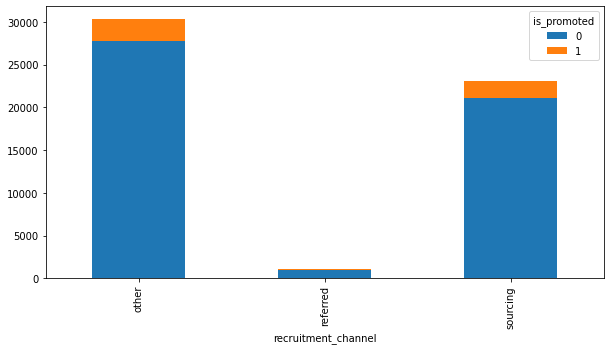

In [40]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(df1.recruitment_channel,df1.is_promoted)
score_bin.plot.bar(stacked=True)

### Analyzing Numeric features with Dependent Feature

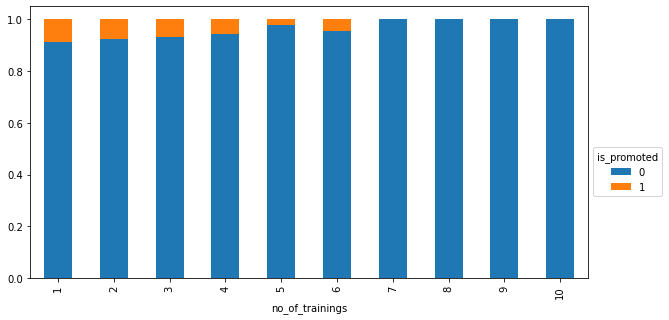

In [41]:
plt.rcParams['figure.figsize'] = [10, 5]
pd.crosstab(df1.no_of_trainings,df1.is_promoted,normalize='index').plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

- From no of trainings 1 to 6, employees are promoted. From no of trainings 7 to 10, employees are not promoted.

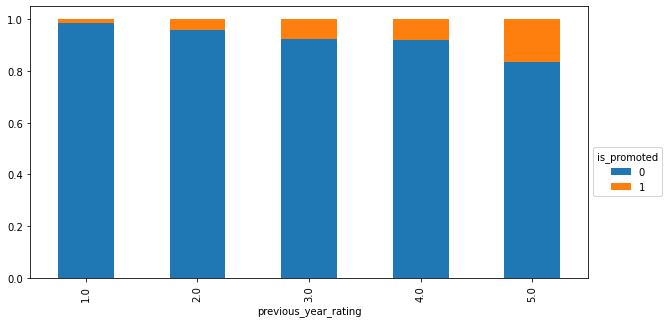

In [42]:
plt.rcParams['figure.figsize'] = [10, 5]
pd.crosstab(df1.previous_year_rating,df1.is_promoted,normalize='index').plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

- Previous year rating matter for employee promotion. As we can see that more previous year rating means more employees promoted.

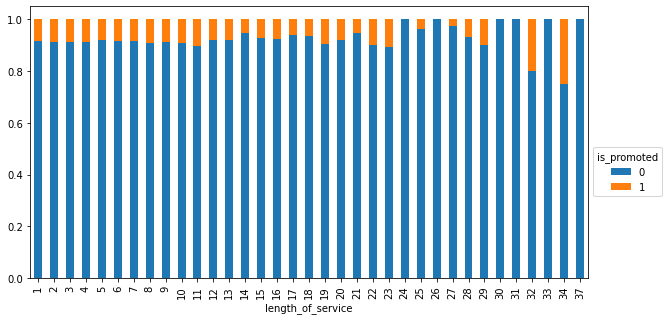

In [43]:
plt.rcParams['figure.figsize'] = [10, 5]
pd.crosstab(df1.length_of_service,df1.is_promoted,normalize='index').plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

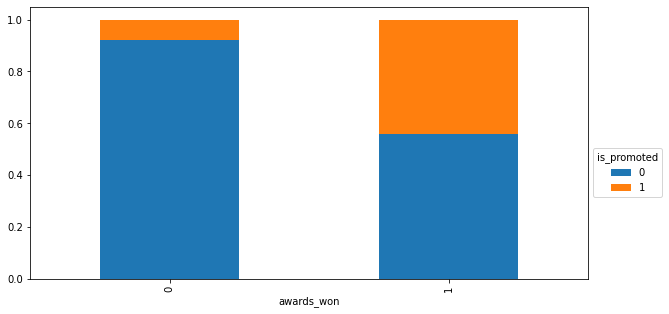

In [44]:
plt.rcParams['figure.figsize'] = [10, 5]
pd.crosstab(df1.awards_won,df1.is_promoted,normalize='index').plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

- Wining awards means more chances to get promoted. as we can see that employees with awards have higher count of promotions.

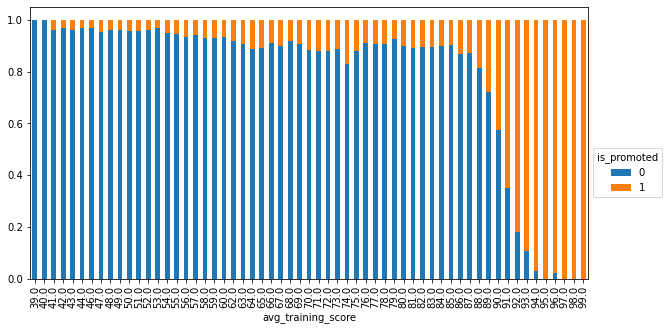

In [45]:
plt.rcParams['figure.figsize'] = [10, 5]
pd.crosstab(df1.avg_training_score,df1.is_promoted,normalize='index').plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

- More Training Score means more chances of promotions

## Encoding these categorical features into numeric type

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
pro=LabelEncoder()
encpro=pro.fit_transform(df1['department'])
df1['department'] = encpro

pro=LabelEncoder()
encpro=pro.fit_transform(df1['region'])
df1['region'] = encpro

pro=LabelEncoder()
encpro=pro.fit_transform(df1['education'])
df1['education'] = encpro

pro=LabelEncoder()
encpro=pro.fit_transform(df1['gender'])
df1['gender'] = encpro

pro=LabelEncoder()
encpro=pro.fit_transform(df1['recruitment_channel'])
df1['recruitment_channel'] = encpro

In [48]:
df1.dtypes

department                int32
region                    int32
education                 int32
gender                    int32
recruitment_channel       int32
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
dtype: object

##  Bivariate Analysis

<Axes: >

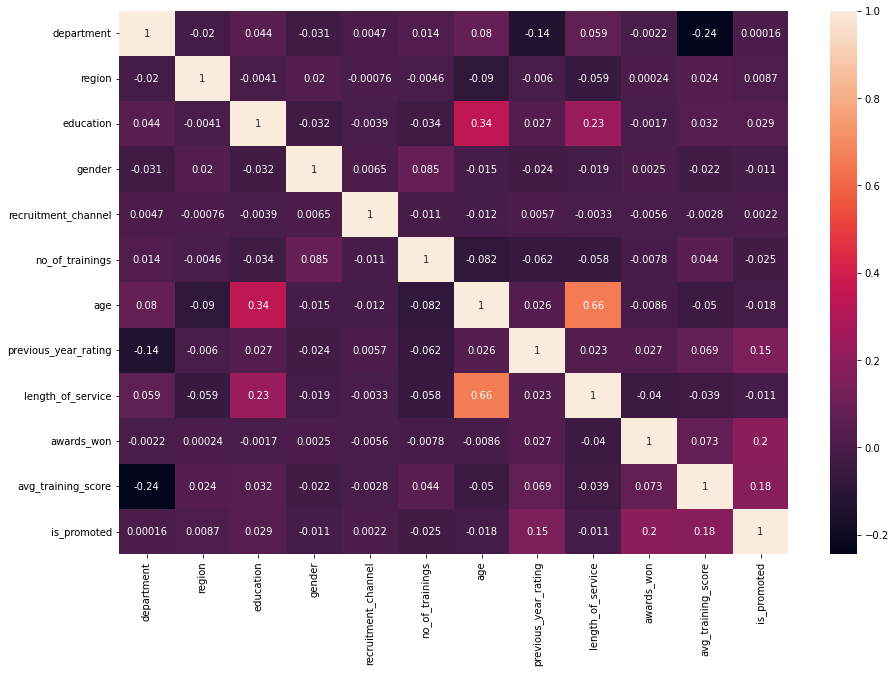

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)

In [50]:
#sns.pairplot(df1,hue='is_promoted')

In [51]:
df1

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,0,49.0,0
1,4,14,0,1,0,1,30,5.0,4,0,60.0,0
2,7,10,0,1,2,1,34,3.0,7,0,50.0,0
3,7,15,0,1,0,2,39,1.0,10,0,50.0,0
4,8,18,0,1,0,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,8,5,0,1,2,1,48,3.0,17,0,78.0,0
54804,4,19,2,0,0,1,37,2.0,6,0,56.0,0
54805,0,0,0,1,0,1,27,5.0,3,0,79.0,0
54806,7,33,0,1,2,1,29,1.0,2,0,60.0,0


## Model Building

In [52]:
X=df1.iloc[:,:11]
Y=df1.loc[:,df1.columns=='is_promoted']

In [53]:
!pip install imblearn

In [54]:
from imblearn import over_sampling
x_sample, y_sample = over_sampling.SMOTE().fit_resample(X,Y.values.ravel())

In [55]:
y_sample=pd.DataFrame(data=y_sample,columns=['is_promoted'])

In [56]:
y_sample.value_counts()

is_promoted
0              49924
1              49924
dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.33, random_state=42)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [59]:
X_test=scaler.transform(X_test)

In [60]:
X_train=pd.DataFrame(X_train,columns=['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score'])

In [61]:
X_test=pd.DataFrame(X_test,columns=['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score'])

In [62]:
X_train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
0,0.835814,1.092271,-0.631086,0.795972,-0.839978,-0.338385,0.218433,0.360675,-0.152511,-0.154467,-1.055331
1,0.835814,-0.282227,-0.631086,0.795972,-0.839978,-0.338385,-1.958631,1.248487,-0.888845,-0.154467,-1.124770
2,-0.359949,0.977729,1.716662,0.795972,1.320787,-0.338385,0.898766,-0.527138,0.092934,-0.154467,-0.499817
3,-1.157125,-0.625852,-0.631086,-1.256326,-0.839978,-0.338385,0.762699,0.370969,-0.397956,-0.154467,-0.847013
4,0.835814,0.863188,-0.631086,0.795972,1.320787,-0.338385,-1.278299,1.248487,-0.888845,-0.154467,-1.194209
...,...,...,...,...,...,...,...,...,...,...,...
66893,0.038639,-0.396769,1.716662,0.795972,-0.839978,-0.338385,0.082366,-0.527138,1.074714,-0.154467,0.194575
66894,-0.359949,0.519563,1.716662,0.795972,-0.839978,-0.338385,1.443032,-2.099664,3.038274,-0.154467,-0.577199
66895,0.835814,-1.313101,-0.631086,0.795972,1.320787,-0.338385,-0.734033,-0.178400,-0.888845,6.473858,1.749513
66896,-1.954301,-1.084018,1.716662,0.795972,-0.839978,3.678517,0.082366,1.248487,-0.643401,-0.154467,1.305602


## Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logist=LogisticRegression()
logist.fit(X_train,y_train)

LogisticRegression()

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [66]:
y_t=logist.predict(X_train)
print(accuracy_score(y_train,y_t))
print(confusion_matrix(y_train,y_t))
print(classification_report(y_train,y_t))

0.689706717689617
[[22636 10645]
 [10113 23504]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.69     33281
           1       0.69      0.70      0.69     33617

    accuracy                           0.69     66898
   macro avg       0.69      0.69      0.69     66898
weighted avg       0.69      0.69      0.69     66898



In [67]:
y_pred=logist.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6856752655538695
[[11212  5431]
 [ 4926 11381]]
              precision    recall  f1-score   support

           0       0.69      0.67      0.68     16643
           1       0.68      0.70      0.69     16307

    accuracy                           0.69     32950
   macro avg       0.69      0.69      0.69     32950
weighted avg       0.69      0.69      0.69     32950



## KFold Validation  with Logistic Regression

In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [69]:
kfold=KFold(n_splits=10)
model_1=LogisticRegression()
result=cross_val_score(model_1,X,Y,cv=kfold)
print(result.mean())

0.9162452993302083


## DecisionTree

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
model_2=DecisionTreeClassifier(random_state=0)
model_2.fit(X_train,y_train)
y_pred=model_2.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9110470409711684
[[14899  1744]
 [ 1187 15120]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     16643
           1       0.90      0.93      0.91     16307

    accuracy                           0.91     32950
   macro avg       0.91      0.91      0.91     32950
weighted avg       0.91      0.91      0.91     32950



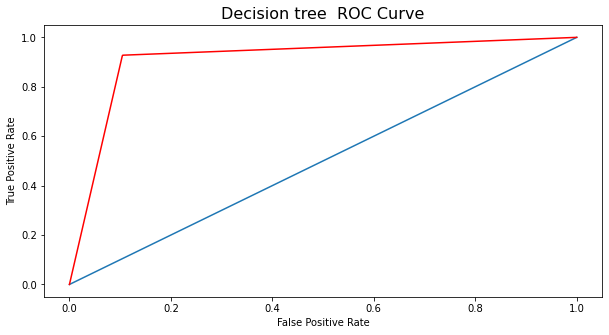

In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
roc_test= model_2.predict_proba(X_test)[:,1]
fpr,tpr, thresholds = roc_curve(y_test, roc_test)
plt.plot([0, 1], [0, 1])
plt.plot(fpr,tpr, label='decision tree using gini',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision tree  ROC Curve',fontsize=16)
plt.show()

In [73]:
x_pred=model_2.predict(X_train)
print(accuracy_score(y_train,x_pred))
print(confusion_matrix(y_train,x_pred))
print(classification_report(y_train,x_pred))

0.9994768154503871
[[33267    14]
 [   21 33596]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33281
           1       1.00      1.00      1.00     33617

    accuracy                           1.00     66898
   macro avg       1.00      1.00      1.00     66898
weighted avg       1.00      1.00      1.00     66898



<Axes: >

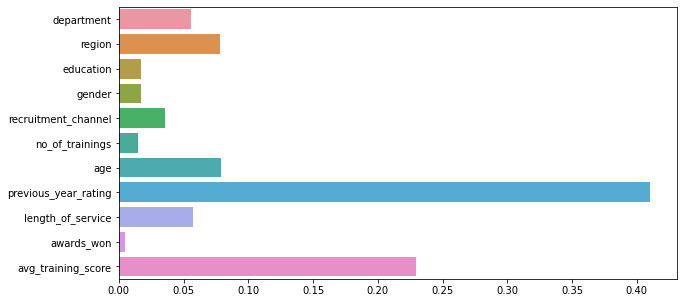

In [74]:
sns.barplot(y=X.columns,x=model_2.feature_importances_)

In [75]:
model_3=DecisionTreeClassifier(criterion='entropy',random_state=0)
model_3.fit(X_train,y_train)
y_pred=model_3.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9131714719271624
[[14934  1709]
 [ 1152 15155]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     16643
           1       0.90      0.93      0.91     16307

    accuracy                           0.91     32950
   macro avg       0.91      0.91      0.91     32950
weighted avg       0.91      0.91      0.91     32950



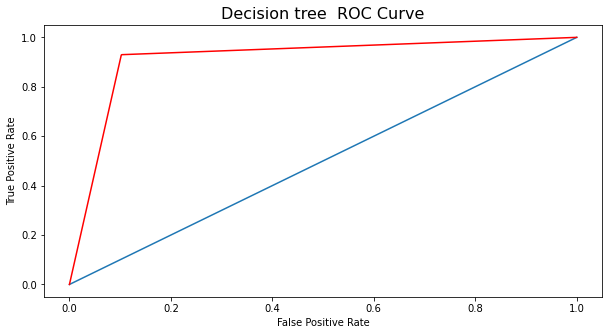

In [76]:
roc_test= model_3.predict_proba(X_test)[:,1]
fpr,tpr, thresholds = roc_curve(y_test, roc_test)
plt.plot([0, 1], [0, 1])
plt.plot(fpr,tpr, label='decision tree using entropy',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision tree  ROC Curve',fontsize=16)
plt.show()

In [77]:
x_pred=model_3.predict(X_train)
print(accuracy_score(y_train,x_pred))
print(confusion_matrix(y_train,x_pred))
print(classification_report(y_train,x_pred))

0.9994768154503871
[[33267    14]
 [   21 33596]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33281
           1       1.00      1.00      1.00     33617

    accuracy                           1.00     66898
   macro avg       1.00      1.00      1.00     66898
weighted avg       1.00      1.00      1.00     66898



<Axes: >

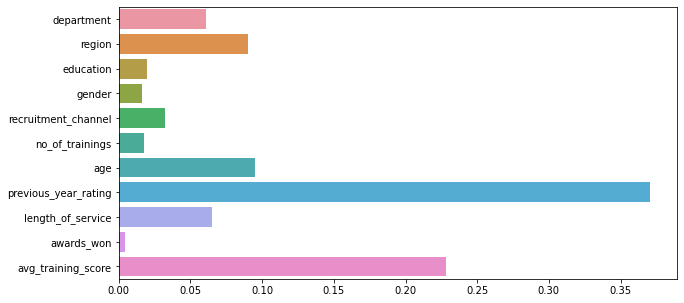

In [78]:
sns.barplot(y=X.columns,x=model_3.feature_importances_)

## RandomForest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
random=RandomForestClassifier(n_estimators=500,criterion='gini',max_features=4,max_samples=300,random_state=0)
model_4=random.fit(X_train,y_train)
x_pred=model_4.predict(X_train)
print(accuracy_score(x_pred,y_train))
print(confusion_matrix(x_pred,y_train))
print(classification_report(x_pred,y_train))

0.8237764955604054
[[28621  7129]
 [ 4660 26488]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83     35750
           1       0.79      0.85      0.82     31148

    accuracy                           0.82     66898
   macro avg       0.82      0.83      0.82     66898
weighted avg       0.83      0.82      0.82     66898



In [81]:
y_pred=model_4.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.8207283763277693
[[14244  3508]
 [ 2399 12799]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83     17752
           1       0.78      0.84      0.81     15198

    accuracy                           0.82     32950
   macro avg       0.82      0.82      0.82     32950
weighted avg       0.82      0.82      0.82     32950



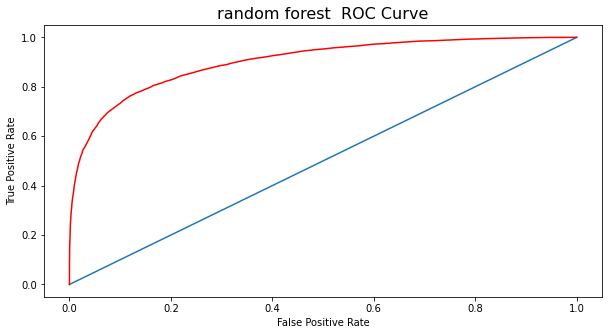

In [82]:
roc_test= model_4.predict_proba(X_test)[:,1]
fpr,tpr, thresholds = roc_curve(y_test, roc_test)
plt.plot([0, 1], [0, 1])
plt.plot(fpr,tpr,color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('random forest  ROC Curve',fontsize=16)
plt.show()

<Axes: >

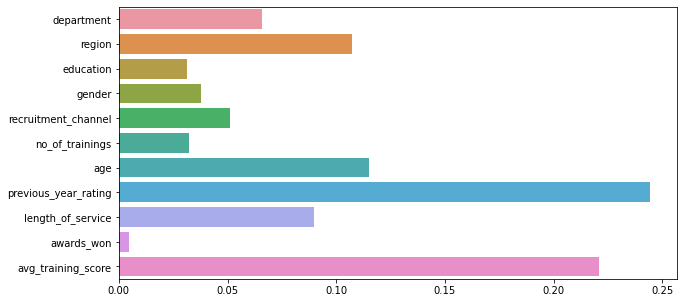

In [83]:
sns.barplot(y=X.columns,x=model_4.feature_importances_)

In [84]:
random=RandomForestClassifier(n_estimators=500,criterion='entropy',max_samples=300,random_state=0)
model_5=random.fit(X_train,y_train)
x_pred=model_5.predict(X_train)
print(accuracy_score(x_pred,y_train))
print(confusion_matrix(x_pred,y_train))
print(classification_report(x_pred,y_train))

0.8193817453436575
[[28313  7115]
 [ 4968 26502]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82     35428
           1       0.79      0.84      0.81     31470

    accuracy                           0.82     66898
   macro avg       0.82      0.82      0.82     66898
weighted avg       0.82      0.82      0.82     66898



In [85]:
y_pred=model_5.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.8150227617602428
[[14066  3518]
 [ 2577 12789]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82     17584
           1       0.78      0.83      0.81     15366

    accuracy                           0.82     32950
   macro avg       0.81      0.82      0.81     32950
weighted avg       0.82      0.82      0.82     32950



<Axes: >

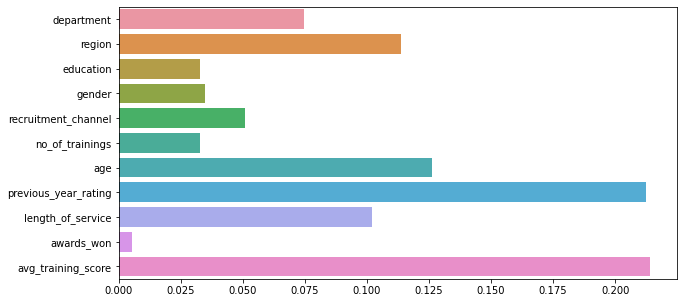

In [86]:
sns.barplot(y=X.columns,x=model_5.feature_importances_)

## AdaBoostClassifier

In [87]:
from sklearn.ensemble import AdaBoostClassifier
gini=DecisionTreeClassifier()
model_6=AdaBoostClassifier(base_estimator=gini,n_estimators=30,random_state=42)
model_6.fit(X_train,y_train)
y_pred=model_5.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8150227617602428
[[14066  2577]
 [ 3518 12789]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82     16643
           1       0.83      0.78      0.81     16307

    accuracy                           0.82     32950
   macro avg       0.82      0.81      0.81     32950
weighted avg       0.82      0.82      0.81     32950



In [88]:
x_pred=model_6.predict(X_train)
print(accuracy_score(x_pred,y_train))
print(confusion_matrix(y_train,x_pred))
print(classification_report(y_train,x_pred))

0.9994768154503871
[[33252    29]
 [    6 33611]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33281
           1       1.00      1.00      1.00     33617

    accuracy                           1.00     66898
   macro avg       1.00      1.00      1.00     66898
weighted avg       1.00      1.00      1.00     66898



In [89]:
entropy=DecisionTreeClassifier(criterion='entropy',random_state=0)
model_7=AdaBoostClassifier(base_estimator=entropy,n_estimators=20,random_state=42)
model_7.fit(X_train,y_train)
y_pred=model_7.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9246433990895296
[[15680   963]
 [ 1520 14787]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     16643
           1       0.94      0.91      0.92     16307

    accuracy                           0.92     32950
   macro avg       0.93      0.92      0.92     32950
weighted avg       0.93      0.92      0.92     32950



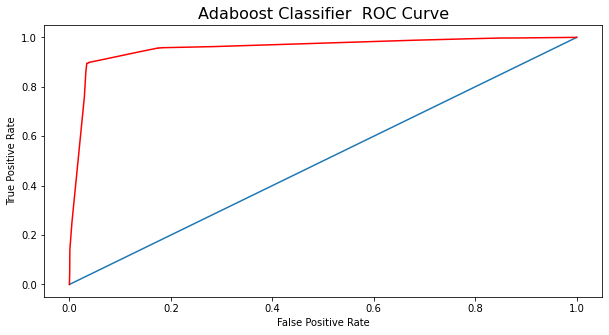

In [90]:
roc_test= model_7.predict_proba(X_test)[:,1]
fpr,tpr, thresholds = roc_curve(y_test, roc_test)
plt.plot([0, 1], [0, 1])
plt.plot(fpr,tpr,color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Adaboost Classifier  ROC Curve',fontsize=16)
plt.show()

In [91]:
x_pred=model_7.predict(X_train)
print(accuracy_score(x_pred,y_train))
print(confusion_matrix(y_train,x_pred))
print(classification_report(y_train,x_pred))

0.9994768154503871
[[33267    14]
 [   21 33596]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33281
           1       1.00      1.00      1.00     33617

    accuracy                           1.00     66898
   macro avg       1.00      1.00      1.00     66898
weighted avg       1.00      1.00      1.00     66898



<Axes: >

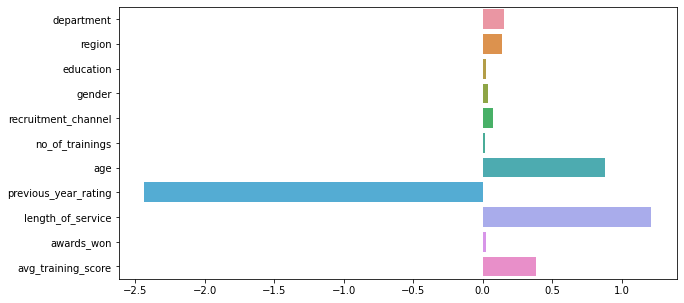

In [92]:
sns.barplot(y=X.columns,x=model_7.feature_importances_)

## Support Vector Machine

In [93]:
from sklearn.svm import SVC

In [ ]:
model_8=SVC(kernel='linear')
model_8.fit(X_train,y_train)
y_pred=model_8.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

In [95]:
x_pred=model_8.predict(X_train)
print(accuracy_score(x_pred,y_train))
print(confusion_matrix(y_train,x_pred))
print(classification_report(y_train,x_pred))

0.6897515620795839
[[22662 10619]
 [10136 23481]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.69     33281
           1       0.69      0.70      0.69     33617

    accuracy                           0.69     66898
   macro avg       0.69      0.69      0.69     66898
weighted avg       0.69      0.69      0.69     66898



In [96]:
model_9=SVC(kernel='poly')
model_9.fit(X_train,y_train)
y_pred=model_9.predict(X_test)
print('accuracy_score: ', accuracy_score(y_pred,y_test))
print('confusion_matrix: ', confusion_matrix(y_pred,y_test))
print('classification_report: ', classification_report(y_pred,y_test))

accuracy_score:  0.7168740515933232
confusion_matrix:  [[11680  4366]
 [ 4963 11941]]
classification_report:                precision    recall  f1-score   support

           0       0.70      0.73      0.71     16046
           1       0.73      0.71      0.72     16904

    accuracy                           0.72     32950
   macro avg       0.72      0.72      0.72     32950
weighted avg       0.72      0.72      0.72     32950



In [97]:
x_pred=model_9.predict(X_train)
print(accuracy_score(x_pred,y_train))
print(confusion_matrix(y_train,x_pred))
print(classification_report(y_train,x_pred))

0.7233848545546953
[[23666  9615]
 [ 8890 24727]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72     33281
           1       0.72      0.74      0.73     33617

    accuracy                           0.72     66898
   macro avg       0.72      0.72      0.72     66898
weighted avg       0.72      0.72      0.72     66898



In [98]:
model_0=SVC(kernel='rbf')
model_0.fit(X_train,y_train)
y_pred=model_0.predict(X_test)
print('accuracy_score: ', accuracy_score(y_pred,y_test))
print('confusion_matrix: ', confusion_matrix(y_pred,y_test))
print('classification_report: ', classification_report(y_pred,y_test))

accuracy_score:  0.7634294385432473
confusion_matrix:  [[13262  4414]
 [ 3381 11893]]
classification_report:                precision    recall  f1-score   support

           0       0.80      0.75      0.77     17676
           1       0.73      0.78      0.75     15274

    accuracy                           0.76     32950
   macro avg       0.76      0.76      0.76     32950
weighted avg       0.77      0.76      0.76     32950



In [99]:
x_pred=model_0.predict(X_train)
print(accuracy_score(x_pred,y_train))
print(confusion_matrix(y_train,x_pred))
print(classification_report(y_train,x_pred))

0.772205447098568
[[26897  6384]
 [ 8855 24762]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78     33281
           1       0.80      0.74      0.76     33617

    accuracy                           0.77     66898
   macro avg       0.77      0.77      0.77     66898
weighted avg       0.77      0.77      0.77     66898



## KNN

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [94]:
#K_value=np.arange(1,20)
#param_grid=dict(n_neighbors=K_value)
#model_11=KNeighborsClassifier()
#grid=GridSearchCV(estimator=model_11,param_grid=param_grid)
#grid.fit(X_train,y_train)

In [95]:
#print(grid.best_score_)
#print(grid.best_params_)

In [96]:
model_12=KNeighborsClassifier(n_neighbors=1)
model_12.fit(X_train,y_train)
y_pred=model_12.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.8911987860394537
[[14086  1028]
 [ 2557 15279]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     15114
           1       0.94      0.86      0.90     17836

    accuracy                           0.89     32950
   macro avg       0.89      0.89      0.89     32950
weighted avg       0.90      0.89      0.89     32950



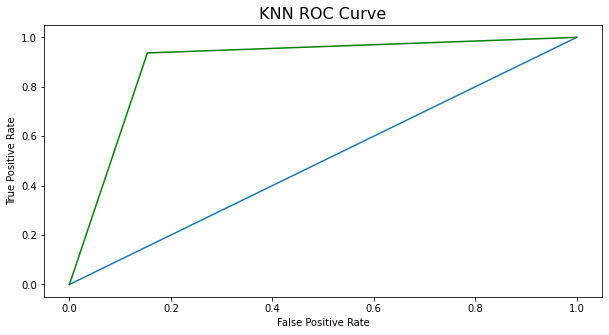

In [97]:
roc_test= model_12.predict_proba(X_test)[:,1]
fpr,tpr, thresholds = roc_curve(y_test, roc_test)
plt.plot([0, 1], [0, 1])
plt.plot(fpr,tpr,color = "g")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve',fontsize=16)
plt.show()

In [98]:
x_pred=model_12.predict(X_train)
print(accuracy_score(y_train,x_pred))
print(confusion_matrix(y_train,x_pred))
print(classification_report(y_train,x_pred))

0.9994020748004425
[[33258    23]
 [   17 33600]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33281
           1       1.00      1.00      1.00     33617

    accuracy                           1.00     66898
   macro avg       1.00      1.00      1.00     66898
weighted avg       1.00      1.00      1.00     66898



## Naive Bayes

In [99]:
from sklearn.naive_bayes import GaussianNB
model_13=GaussianNB()
model_13.fit(X_train,y_train)
y_pred=model_13.predict(X_test)
print('accuracy_score: ',accuracy_score(y_test,y_pred))
print('confusion_metrix: ',confusion_matrix(y_test,y_pred))
print('classification_report: ',classification_report(y_test,y_pred))

accuracy_score:  0.6809408194233687
confusion_metrix:  [[10193  6450]
 [ 4063 12244]]
classification_report:                precision    recall  f1-score   support

           0       0.71      0.61      0.66     16643
           1       0.65      0.75      0.70     16307

    accuracy                           0.68     32950
   macro avg       0.68      0.68      0.68     32950
weighted avg       0.69      0.68      0.68     32950



In [100]:
x_pred=model_13.predict(X_train)
print(accuracy_score(y_train,x_pred))
print(confusion_matrix(y_train,x_pred))
print(classification_report(y_train,x_pred))

0.6834733474842297
[[20509 12772]
 [ 8403 25214]]
              precision    recall  f1-score   support

           0       0.71      0.62      0.66     33281
           1       0.66      0.75      0.70     33617

    accuracy                           0.68     66898
   macro avg       0.69      0.68      0.68     66898
weighted avg       0.69      0.68      0.68     66898



In [101]:
from prettytable import PrettyTable

In [102]:
myTable = PrettyTable(['model','Training Accuracy','Testing Accuracy'])

In [103]:
myTable.add_row(['LogisticRegression',0.68,0.68])
myTable.add_row(['DecisionTreeClassifier_gini',0.99,0.91])
myTable.add_row(['DecisionTreeClassifier_entropy',0.99,0.91])
myTable.add_row(['RandomForestClassifier_gini',0.82,0.82])
myTable.add_row(['RandomForestClassifier_entropy',0.82,0.82])
myTable.add_row(['AdaBoostClassifier_gini',0.99,0.82])
myTable.add_row(['AdaBoostClassifier_entropy',0.99,0.92])
myTable.add_row(['Support Vector Machine_linear',0.68,0.68])
myTable.add_row(['Support Vector Machine_poly',0.72,0.71])
myTable.add_row(['Support Vector Machine_rbf',0.77,0.76])
myTable.add_row(['KNN',0.99,0.89])
myTable.add_row(['Naive_bayes',0.68,0.68])

In [104]:
myTable

model,Training Accuracy,Testing Accuracy
LogisticRegression,0.68,0.68
DecisionTreeClassifier_gini,0.99,0.91
DecisionTreeClassifier_entropy,0.99,0.91
RandomForestClassifier_gini,0.82,0.82
RandomForestClassifier_entropy,0.82,0.82
AdaBoostClassifier_gini,0.99,0.82
AdaBoostClassifier_entropy,0.99,0.92
Support Vector Machine_linear,0.68,0.68
Support Vector Machine_poly,0.72,0.71
Support Vector Machine_rbf,0.77,0.76
